## Structure Parsing and Vizualizations

In [ ]:
import matplotlib.pyplot as plt
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

def read_fasta_file(fasta_file):
    with open(fasta_file, 'r') as file:
        sequences, structures, names = [], [], []
        line_counter = 0  #keep track of line position

        for line in file:
            line = line.strip()
            if line.startswith('>'):
                names.append(line[1:])  #adding names
                line_counter = 0
            else:
                line_counter += 1
                if line_counter == 1:
                    sequences.append(line)  #adding sequences
                elif line_counter == 2:
                    structures.append(line)  #adding structures

    return sequences, structures, names


fasta_file = '/workspaces/466-project/output/microgreen_id_rna_structure_1 copy.fasta'
output_dir = '/workspaces/466-project/Structure Visualizations'


sequences, structures, names = read_fasta_file(fasta_file)
print("Sequences:", sequences)
print("Structures:", structures)
print("Names:", names)

def generate_structure_plots(sequences, structures, names, output_dir):
    for i, (seq, struct, name) in enumerate(zip(sequences, structures, names)):
        if len(seq) != len(struct):
            print(f"Length mismatch for {name}: sequence length is {len(seq)}, structure length is {len(struct)}")
            continue
        try:
            bg = fgb.BulgeGraph.from_dotbracket(struct, seq)
            plt.figure(figsize=(10, 10))
            fvm.plot_rna(bg, lighten=.5, text_kwargs={"visible": False})
            plt.title(f"{name} (Structure {i+1})")
            plt.tight_layout()
            file_path = f"{output_dir}/{name}_structure_{i+1}.png"
            plt.savefig(file_path)
            plt.close()
            print(f"Generated plot for: {name}, saved to {file_path}")
        except Exception as e:
            print(f"Error processing structure {i+1} ({name}): {e}")


generate_structure_plots(sequences, structures, names, output_dir)


## Web App

In [39]:
import dash
from dash import html
import base64
import os

app = dash.Dash(__name__)
app.title = 'Algae rRNA Structure Visualizations - Zayn Khan & Sofia Sivilotti'  


output_dir = '/workspaces/466-project/Structure Visualizations'  

image_grid_style = {
    'display': 'grid',
    'grid-template-columns': 'repeat(auto-fill, minmax(500px, 1fr))',
    'grid-gap': '10px',
    'max-height': '1000px',
    'overflow-y': 'scroll'
}

def encode_image(image_path):
    with open(image_path, 'rb') as file:
        encoded_string = base64.b64encode(file.read()).decode()
    return f'data:image/png;base64,{encoded_string}'

def get_image_files(directory):
    supported_extensions = ['.png', '.jpg', '.jpeg']
    return [f for f in os.listdir(directory) if os.path.splitext(f)[1].lower() in supported_extensions]

#loading and encoding images from the output directory
image_files = get_image_files(output_dir)
encoded_images_with_labels = [
    html.Div([
        html.Img(src=encode_image(os.path.join(output_dir, img_file)), style={'width': '100%', 'padding': '10px'}),
        html.P(img_file.split('_')[0], style={'text-align': 'center', 'border-bottom': '1px solid black'}),  
    ]) for img_file in image_files
]

app.layout = html.Div([
    html.H1('Algae rRNA Structure Visualizations - Zayn Khan & Sofia Sivilotti', style={'text-align': 'center'}),  
    html.Div(encoded_images_with_labels, style=image_grid_style)
])

if __name__ == '__main__':
    app.run_server(debug=True)


## Bar Chart Vizualization

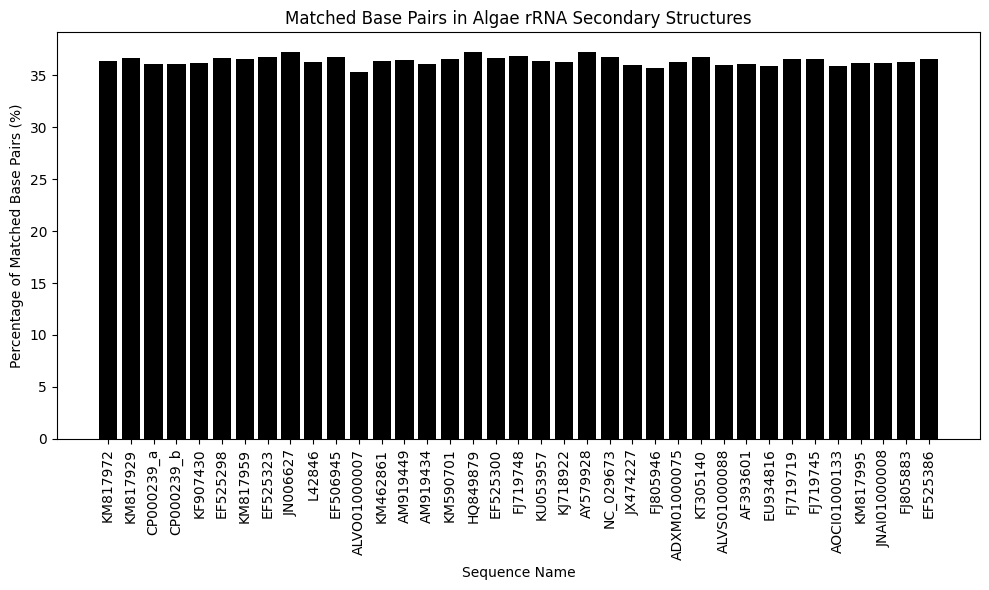

In [45]:
fasta_file = '/workspaces/466-project/output/microgreen_id_rna_structure_1 copy.fasta'

#calculate matched percentage
def calculate_matched_percentage(structure):
    open_brackets = structure.count('(')
    close_brackets = structure.count(')')
    matched_pairs = min(open_brackets, close_brackets)

    total_bases = len(structure)
    if total_bases == 0:
        return 0
    return (matched_pairs / total_bases) * 100

sequences, structures, names = read_fasta_file(fasta_file)
matched_percentages = [calculate_matched_percentage(struct) for struct in structures]

import matplotlib.pyplot as plt

def plot_matched_percentages(names, matched_percentages):
    plt.figure(figsize=(10, 6))
    plt.bar(names, matched_percentages, color='black')
    plt.xlabel('Sequence Name')
    plt.ylabel('Percentage of Matched Base Pairs (%)')
    plt.title('Matched Base Pairs in Algae rRNA Secondary Structures')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_matched_percentages(names, matched_percentages)